In [1]:
import pandas as pd
import numpy as np
import math
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Initialize(tickers,startyear,startmonth,startday,interval):
    yf.pdr_override()
    tickers=tickers
    startyear=startyear
    startmonth=startmonth
    startday=startday
    interval=interval
    start=dt.datetime(startyear,startmonth,startday,)
    now=dt.datetime.now()
    df=pdr.get_data_yahoo(tickers,start,now, interval=interval,)
    df.drop(['High', 'Low','Open','Close','Volume'], axis=1, inplace=True)
    df.columns = df.columns.droplevel(0)
    return df

In [3]:
df=Initialize(tickers=['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN'],
           startyear=2020,
           startmonth=7,
           startday=1,
           interval="1d")

[*********************100%***********************]  26 of 26 completed


In [4]:
df2=df.pct_change()
df2.dropna(inplace=True)

In [5]:
df3=df2.corr()

In [6]:
'''
To find the Minimum Variance Portfolio, Correlation Matrix is not useful since correlation is always in pairs
using this we can never find out list of uncorrelated stocks. 
It is also worth mentioning, 
If 
A is uncorrelated to B
A is uncorrelated to C
It does justify B is uncorrelated to C
So to conclude we need a way to create all possible combinations of stocks to find portfolio of least variance 
'''

'\nTo find the Minimum Variance Portfolio, Correlation Matrix is not useful since correlation is always in pairs\nusing this we can never find out list of uncorrelated stocks. \nIt is also worth mentioning, \nIf \nA is uncorrelated to B\nA is uncorrelated to C\nIt does justify B is uncorrelated to C\nSo to conclude we need a way to create all possible combinations of stocks to find portfolio of least variance \n'

In [7]:
Er=np.array(df2.describe().loc['mean'])
std=np.array(df2.describe().loc['std'])
var=std**2
varcovar1=df2.cov()

In [8]:
# Efficient Portfolio A

c1=0

weightA=np.linalg.inv(varcovar1) @ (Er-c1) / np.sum(np.linalg.inv(varcovar1) @ (Er-c1))
ErA=weightA@Er
VarA=weightA@varcovar1@weightA.T
stdA=np.sqrt(VarA)

In [9]:
# Efficient Portfolio B

c2=0.04

weightB=np.linalg.inv(varcovar1) @ (Er-c2) / np.sum(np.linalg.inv(varcovar1) @ (Er-c2))
ErB=weightB@Er
VarB=weightB@varcovar1@weightB.T
stdB=np.sqrt(VarB)

In [10]:
covAB=weightA@varcovar1@weightB.T

In [11]:
wa=np.linspace(-1.5,4.5,num=100)
wb=1-wa

In [12]:
ErC=wa*ErA + wb*ErB

In [13]:
stdC=np.sqrt((wa*stdA)**2 + (wb*stdB)**2 + 2*wa*wb*covAB)

In [14]:
UM=np.ones((varcovar1.shape[0]))

GMVP=UM @ np.linalg.inv(varcovar1) / (UM @ np.linalg.inv(varcovar1) @ UM.T)

In [15]:
GMVP

array([ 0.10899855,  0.05784007,  0.11334048,  0.0195891 ,  0.06303886,
       -0.07236094,  0.02381828,  0.00105162,  0.02112837,  0.01547621,
        0.00515849, -0.04531944,  0.00802877,  0.1062106 , -0.05231315,
        0.01575185,  0.02069074,  0.0658363 ,  0.02090613,  0.11802533,
        0.05572115,  0.02459583, -0.07243153,  0.15561234,  0.18367692,
        0.03792906])

In [16]:
ErG=GMVP@Er
stdG=np.sqrt(GMVP@varcovar1@GMVP.T)

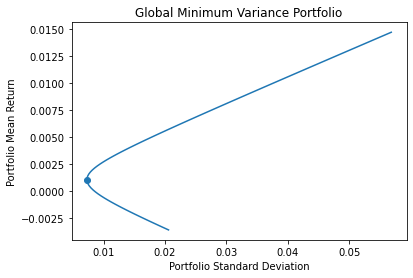

In [17]:
plt.xlabel("Portfolio Standard Deviation")
plt.ylabel("Portfolio Mean Return")
plt.title("Global Minimum Variance Portfolio")
plt.plot(stdC,ErC)
plt.scatter(stdG,ErG)
plt.show()